In [2]:
import requests
import json
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
lat = "40.7128"
lon = "-74.0060"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")
                      
json_file = genius.json()
json_file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/40.7128,-74.006',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-74.006, 40.7128]},
 'properties': {'@id': 'https://api.weather.gov/poi

In [3]:
forecast=json_file['properties']['forecast']

new_request = requests.get(forecast)

json = new_request.json()
json

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-74.0250952, 40.7270524],
    [-74.0295579, 40.7053617],
    [-74.0009483, 40.7019775],
    [-73.9964798, 40.723667899999995],
    [-74.0250952, 40.7270524]]]},
 'properties': {'updated': '2023-03-14T23:10:19+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-15T00:00:37+00:00',
  'updateTime': '2023-03-14T23:10:19+00:00',
  'validTimes': '2023-03-14T17:00:00+00:00/P7DT14H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 2.1336},
  'periods': [{'number': 1,
    'name': 'Tonight',
    'startTime': '2023-03-14T20:00:00-04:00',
    'endTime': '2023-03-15T06:00:00-04:00',
    'is

In [4]:
csv_file = open("weather.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["day", "temp", "description"])

22

In [5]:
a = json['properties']['periods']

for i in a:
    name = i['name']
    temp = i['temperature']
    description = i['detailedForecast']
    
    csv_writer.writerow([name, temp, description])

csv_file.close()

In [6]:
sheet = sheet = pd.read_csv("weather.csv")
sheet

,day,temp,description
0,Tonight,33,"A chance of snow before 11pm. Cloudy, with a l..."
1,Wednesday,43,"Mostly cloudy, with a high near 43. Wind chill..."
2,Wednesday Night,34,"Partly cloudy, with a low around 34. Northwest..."
3,Thursday,54,"Mostly sunny, with a high near 54. West wind 9..."
4,Thursday Night,42,A slight chance of rain after 2am. Mostly clou...
5,Friday,55,"A chance of rain. Cloudy. High near 55, with t..."
6,Friday Night,43,"A chance of rain. Mostly cloudy, with a low ar..."
7,Saturday,51,"A chance of rain before 2pm. Partly sunny, wit..."
8,Saturday Night,30,"Partly cloudy, with a low around 30."
9,Sunday,42,"Mostly sunny, with a high near 42."


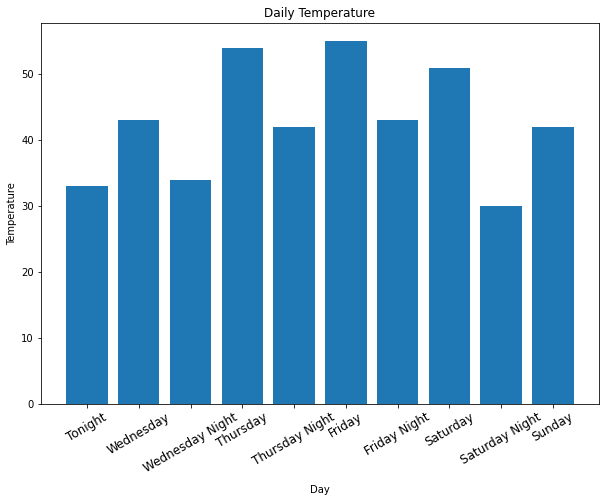

In [123]:
df=pd.DataFrame(sheet)

day=df["day"]
temp = df["temp"]

fig = plt.figure(figsize=(10,7))
plt.bar(day[0:10],temp[0:10])

plt.tick_params(axis='x', which='major', labelsize=12, rotation = 30) #Bonus, https://stackoverflow.com/questions/52523710/matplotlib-increase-spacing-between-points-on-x-axis

plt.xlabel("Day", labelpad = 10)
plt.ylabel("Temperature")
plt.title("Daily Temperature")

plt.show()

In [8]:
country_info = requests.get(f"https://date.nager.at/api/v3/CountryInfo/AF")#API changes based on the country code put in the url
                      
json2 = country_info.json()
json2

#this call returns the name of the country, what continent it is in, and what countries border it

{'commonName': 'Afghanistan',
 'officialName': 'Islamic Republic of Afghanistan',
 'countryCode': 'AF',
 'region': 'Asia',
 'borders': [{'commonName': 'Iran',
   'officialName': 'Islamic Republic of Iran',
   'countryCode': 'IR',
   'region': 'Asia',
   'borders': None},
  {'commonName': 'Pakistan',
   'officialName': 'Islamic Republic of Pakistan',
   'countryCode': 'PK',
   'region': 'Asia',
   'borders': None},
  {'commonName': 'Turkmenistan',
   'officialName': 'Turkmenistan',
   'countryCode': 'TM',
   'region': 'Asia',
   'borders': None},
  {'commonName': 'Uzbekistan',
   'officialName': 'Republic of Uzbekistan',
   'countryCode': 'UZ',
   'region': 'Asia',
   'borders': None},
  {'commonName': 'Tajikistan',
   'officialName': 'Republic of Tajikistan',
   'countryCode': 'TJ',
   'region': 'Asia',
   'borders': None},
  {'commonName': 'China',
   'officialName': "People's Republic of China",
   'countryCode': 'CN',
   'region': 'Asia',
   'borders': None}]}

In [9]:
avail_countries = requests.get(f"https://date.nager.at/api/v3/AvailableCountries")

json3 = avail_countries.json()
json3

#lists all the countries in the API

[{'countryCode': 'AD', 'name': 'Andorra'},
 {'countryCode': 'AL', 'name': 'Albania'},
 {'countryCode': 'AR', 'name': 'Argentina'},
 {'countryCode': 'AT', 'name': 'Austria'},
 {'countryCode': 'AU', 'name': 'Australia'},
 {'countryCode': 'AX', 'name': 'Åland Islands'},
 {'countryCode': 'BA', 'name': 'Bosnia and Herzegovina'},
 {'countryCode': 'BB', 'name': 'Barbados'},
 {'countryCode': 'BE', 'name': 'Belgium'},
 {'countryCode': 'BG', 'name': 'Bulgaria'},
 {'countryCode': 'BJ', 'name': 'Benin'},
 {'countryCode': 'BO', 'name': 'Bolivia'},
 {'countryCode': 'BR', 'name': 'Brazil'},
 {'countryCode': 'BS', 'name': 'Bahamas'},
 {'countryCode': 'BW', 'name': 'Botswana'},
 {'countryCode': 'BY', 'name': 'Belarus'},
 {'countryCode': 'BZ', 'name': 'Belize'},
 {'countryCode': 'CA', 'name': 'Canada'},
 {'countryCode': 'CH', 'name': 'Switzerland'},
 {'countryCode': 'CL', 'name': 'Chile'},
 {'countryCode': 'CN', 'name': 'China'},
 {'countryCode': 'CO', 'name': 'Colombia'},
 {'countryCode': 'CR', 'name':

In [10]:
long_weekend = requests.get(f"https://date.nager.at/api/v3/LongWeekend/2023/US")

json4 = long_weekend.json()
json4

#tells you the dates and lengths of long weekends in the country

[{'startDate': '2022-12-31',
  'endDate': '2023-01-02',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-01-14',
  'endDate': '2023-01-16',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-02-18',
  'endDate': '2023-02-20',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-05-27',
  'endDate': '2023-05-29',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-06-17',
  'endDate': '2023-06-19',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-07-01',
  'endDate': '2023-07-04',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2023-09-02',
  'endDate': '2023-09-04',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-11-10',
  'endDate': '2023-11-12',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-11-23',
  'endDate': '2023-11-26',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2023-12-23',
  'endDate': '2023-12-25',
  'dayCount': 3,
  'needBridgeDay': False}]

In [11]:
public_holidays = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/2023/US")

json5 = public_holidays.json()
json5

#tells you the public holidays of the country and details like launch year and if it's.a global holiday

[{'date': '2023-01-02',
  'localName': "New Year's Day",
  'name': "New Year's Day",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-01-16',
  'localName': 'Martin Luther King, Jr. Day',
  'name': 'Martin Luther King, Jr. Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-02-20',
  'localName': 'Presidents Day',
  'name': "Washington's Birthday",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-07',
  'localName': 'Good Friday',
  'name': 'Good Friday',
  'countryCode': 'US',
  'fixed': False,
  'global': False,
  'counties': ['US-CT',
   'US-DE',
   'US-HI',
   'US-IN',
   'US-KY',
   'US-LA',
   'US-NC',
   'US-ND',
   'US-NJ',
   'US-TN'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-

In [ ]:
today_holiday = requests.get(f"https://date.nager.at/api/v3/IsTodayPublicHoliday/US?offset=0")

json6 = today_holiday.json()
json6

#tells you if it is a holiday

In [12]:
next_holiday = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidays/CA")

json7 = next_holiday.json()
json7
#tells you what the next public holiday in this country is

[{'date': '2023-03-17',
  'localName': "Saint Patrick's Day",
  'name': "Saint Patrick's Day",
  'countryCode': 'CA',
  'fixed': True,
  'global': False,
  'counties': ['CA-NL'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-07',
  'localName': 'Good Friday',
  'name': 'Good Friday',
  'countryCode': 'CA',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-10',
  'localName': 'Easter Monday',
  'name': 'Easter Monday',
  'countryCode': 'CA',
  'fixed': False,
  'global': False,
  'counties': ['CA-AB', 'CA-PE'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-23',
  'localName': "Saint George's Day",
  'name': "Saint George's Day",
  'countryCode': 'CA',
  'fixed': True,
  'global': False,
  'counties': ['CA-NL'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-22',
  'localName': "National Patriots' Day",
  'name': "National Patriots' Day",
  'countryCode': 'CA',
 

In [13]:
next_holiday_world = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidaysWorldwide")

json8 = next_holiday_world.json()
json8

#tells you the date of the next holidays around the world and the country code of the country that celebrates it 

[{'date': '2023-03-14',
  'localName': 'Dia de la Constitució',
  'name': 'Constitution Day',
  'countryCode': 'AD',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-14',
  'localName': 'Dita e Verës',
  'name': 'Summer Day',
  'countryCode': 'AL',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-15',
  'localName': 'Nemzeti ünnep',
  'name': '1848 Revolution Memorial Day',
  'countryCode': 'HU',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-17',
  'localName': "Saint Patrick's Day",
  'name': "Saint Patrick's Day",
  'countryCode': 'CA',
  'fixed': True,
  'global': False,
  'counties': ['CA-NL'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-17',
  'localName': "Saint Patrick's Day",
  'name': "Saint Patrick's Day",
  'countryCode': 'GB',
  'fixed': Tru

In [3]:
class Countries:
    def __init__(self,country):
        self.country = country
        
    def holiday_info(self):
        public_holidays = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/2023/{self.country}")
        global new_json
        new_json = public_holidays.json()
        print(new_json)
        
    def count(self):
        global holiday_count
        holiday_count = 0
        for i in new_json:
            holiday_count+=1
        print(f"Number of holidays: {holiday_count}")

In [4]:
usa = Countries('US')
usa.holiday_info()
usa.count()

[{'date': '2023-01-02', 'localName': "New Year's Day", 'name': "New Year's Day", 'countryCode': 'US', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-01-16', 'localName': 'Martin Luther King, Jr. Day', 'name': 'Martin Luther King, Jr. Day', 'countryCode': 'US', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-02-20', 'localName': 'Presidents Day', 'name': "Washington's Birthday", 'countryCode': 'US', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-04-07', 'localName': 'Good Friday', 'name': 'Good Friday', 'countryCode': 'US', 'fixed': False, 'global': False, 'counties': ['US-CT', 'US-DE', 'US-HI', 'US-IN', 'US-KY', 'US-LA', 'US-NC', 'US-ND', 'US-NJ', 'US-TN'], 'launchYear': None, 'types': ['Public']}, {'date': '2023-04-07', 'localName': 'Good Friday', 'name': 'Good Friday', 'countryCode': 'US', 'fixed': False, 'g

In [5]:
canada = Countries('CA')
canada.holiday_info()
canada.count()

[{'date': '2023-01-01', 'localName': "New Year's Day", 'name': "New Year's Day", 'countryCode': 'CA', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-02-20', 'localName': 'Louis Riel Day', 'name': 'Louis Riel Day', 'countryCode': 'CA', 'fixed': False, 'global': False, 'counties': ['CA-MB'], 'launchYear': None, 'types': ['Public']}, {'date': '2023-02-20', 'localName': 'Islander Day', 'name': 'Islander Day', 'countryCode': 'CA', 'fixed': False, 'global': False, 'counties': ['CA-PE'], 'launchYear': None, 'types': ['Public']}, {'date': '2023-02-20', 'localName': 'Heritage Day', 'name': 'Heritage Day', 'countryCode': 'CA', 'fixed': False, 'global': False, 'counties': ['CA-NS'], 'launchYear': None, 'types': ['Public']}, {'date': '2023-02-20', 'localName': 'Family Day', 'name': 'Family Day', 'countryCode': 'CA', 'fixed': False, 'global': False, 'counties': ['CA-AB', 'CA-BC', 'CA-NB', 'CA-ON', 'CA-SK'], 'launchYear': None, 'types': ['Pu

In [6]:
mexico = Countries('MX')
mexico.holiday_info()
mexico.count()

[{'date': '2023-01-02', 'localName': 'Año Nuevo', 'name': "New Year's Day", 'countryCode': 'MX', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-02-06', 'localName': 'Día de la Constitución', 'name': 'Constitution Day', 'countryCode': 'MX', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-03-20', 'localName': 'Natalicio de Benito Juárez', 'name': "Benito Juárez's birthday", 'countryCode': 'MX', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-05-01', 'localName': 'Día del Trabajo', 'name': 'Labor Day', 'countryCode': 'MX', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-09-15', 'localName': 'Día de la Independencia', 'name': 'Independence Day', 'countryCode': 'MX', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, 

In [7]:
morocco = Countries('MA')
morocco.holiday_info()
morocco.count()

[{'date': '2023-01-01', 'localName': "Ras l' âm", 'name': "New Year's Day", 'countryCode': 'MA', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-01-11', 'localName': 'Takdim watikat al-istiqlal', 'name': 'Proclamation of Independence', 'countryCode': 'MA', 'fixed': True, 'global': True, 'counties': None, 'launchYear': 1956, 'types': ['Public']}, {'date': '2023-05-01', 'localName': 'Eid Ash-Shughl', 'name': 'Labour Day', 'countryCode': 'MA', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-07-30', 'localName': 'Eid Al-Ârch', 'name': 'Enthronement', 'countryCode': 'MA', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-08-14', 'localName': 'Oued Ed-Dahab Day', 'name': 'Zikra Oued Ed-Dahab', 'countryCode': 'MA', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-08-2

In [8]:
romania = Countries('RO')
romania.holiday_info()
romania.count()

[{'date': '2023-01-01', 'localName': 'Anul Nou', 'name': "New Year's Day", 'countryCode': 'RO', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-01-02', 'localName': 'Anul Nou', 'name': "Day after New Year's Day", 'countryCode': 'RO', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-01-24', 'localName': 'Unirea Principatelor Române/Mica Unire', 'name': 'Union Day/Small Union', 'countryCode': 'RO', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-04-14', 'localName': 'Vinerea mare', 'name': 'Good Friday', 'countryCode': 'RO', 'fixed': False, 'global': True, 'counties': None, 'launchYear': 2018, 'types': ['Public']}, {'date': '2023-04-16', 'localName': 'Paștele', 'name': 'Easter Sunday', 'countryCode': 'RO', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-04-17'

In [9]:
madagascar = Countries('MG')
madagascar.holiday_info()
madagascar.count()

[{'date': '2023-01-01', 'localName': "New Year's Day", 'name': "New Year's Day", 'countryCode': 'MG', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-03-29', 'localName': "Martyrs' Day", 'name': "Martyrs' Day", 'countryCode': 'MG', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-04-10', 'localName': 'Easter Monday', 'name': 'Easter Monday', 'countryCode': 'MG', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-05-01', 'localName': 'Labour Day', 'name': 'Labour Day', 'countryCode': 'MG', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-05-18', 'localName': 'Ascension Day', 'name': 'Ascension Day', 'countryCode': 'MG', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-05-29', 'localName': 'Whit Monday', 'n

In [10]:
venezuela = Countries('VE')
venezuela.holiday_info()
venezuela.count()

[{'date': '2023-01-01', 'localName': 'Día de Año Nuevo', 'name': "New Year's Day", 'countryCode': 'VE', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-01-06', 'localName': 'Día de Reyes', 'name': 'Epiphany', 'countryCode': 'VE', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-01-14', 'localName': 'Día de la Divina Pastora', 'name': 'Feast of the Divina Pastora', 'countryCode': 'VE', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-01-15', 'localName': 'Día del Maestro', 'name': "Teacher's Day", 'countryCode': 'VE', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-02-12', 'localName': 'Día de la Juventud', 'name': 'Youth Day', 'countryCode': 'VE', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-02-20', 

In [11]:
bahamas = Countries('BS')
bahamas.holiday_info()
bahamas.count()

[{'date': '2023-01-02', 'localName': "New Year's Day", 'name': "New Year's Day", 'countryCode': 'BS', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-01-09', 'localName': 'Majority Rule Day', 'name': 'Majority Rule Day', 'countryCode': 'BS', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-04-03', 'localName': 'Perry Christie Day', 'name': 'Perry Christie Day', 'countryCode': 'BS', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-04-07', 'localName': 'Good Friday', 'name': 'Good Friday', 'countryCode': 'BS', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-04-10', 'localName': 'Easter Monday', 'name': 'Easter Monday', 'countryCode': 'BS', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-05-29', 'localNa

In [12]:
egypt = Countries('EG')
egypt.holiday_info()
egypt.count()

[{'date': '2023-01-07', 'localName': 'عيد الميلاد المجيد', 'name': 'Christmas', 'countryCode': 'EG', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-01-25', 'localName': 'عيد الثورة 25 يناير', 'name': 'Revolution Day 2011 National Police Day', 'countryCode': 'EG', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-04-25', 'localName': 'عيد تحرير سيناء', 'name': 'Sinai Liberation Day', 'countryCode': 'EG', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-05-01', 'localName': 'عيد العمال', 'name': 'Labour Day', 'countryCode': 'EG', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-07-23', 'localName': 'عيد ثورة 23 يوليو', 'name': 'Revolution Day', 'countryCode': 'EG', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date':

In [13]:
dom_republic = Countries('DO')
dom_republic.holiday_info()
dom_republic.count()

[{'date': '2023-01-01', 'localName': "New Year's Day", 'name': "New Year's Day", 'countryCode': 'DO', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-01-06', 'localName': 'Dia de Reyes', 'name': 'Day of Kings', 'countryCode': 'DO', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-01-21', 'localName': 'Our Lady of Altagracia', 'name': 'Our Lady of Altagracia', 'countryCode': 'DO', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-01-26', 'localName': "Duarte's Birthday", 'name': "Duarte's Birthday", 'countryCode': 'DO', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-02-27', 'localName': 'Independence Day', 'name': 'Independence Day', 'countryCode': 'DO', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-04

In [ ]:
#Bonus

In [14]:
countries = ['US', "CA", 'MX', 'MA', 'RO', 'MG', 'VE', 'BS', 'EG', 'DO']

In [39]:
count = []
for i in countries:
    public_holidays = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/2023/{i}")
    new_json = public_holidays.json()
    holiday_count = 0
    
    for i in new_json:
        holiday_count+=1
    print(holiday_count)
    count.append(holiday_count)
    
print(count)

13
30
7
9
15
10
38
11
6
13
[13, 30, 7, 9, 15, 10, 38, 11, 6, 13]


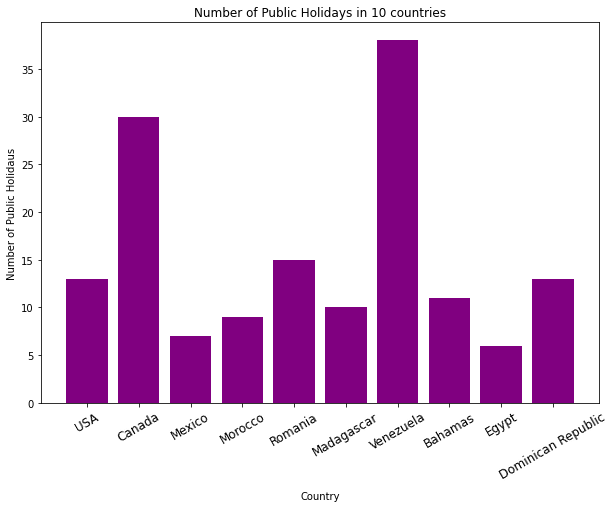

In [45]:
fig = plt.figure(figsize=(10,7))

countries_full= ['USA','Canada','Mexico','Morocco','Romania','Madagascar','Venezuela','Bahamas','Egypt', 'Dominican Republic']

plt.bar(countries_full,count, color = 'purple')

plt.tick_params(axis='x', which='major', labelsize=12, rotation = 30)

plt.xlabel("Country", labelpad = 10)
plt.ylabel("Number of Public Holidaus")
plt.title("Number of Public Holidays in 10 countries")

plt.show()